In [1]:
!pip install -U scipy

Requirement already up-to-date: scipy in /Users/loonycorn/anaconda3/lib/python3.7/site-packages (1.3.1)


In [2]:
!pip install -U statsmodels

Requirement already up-to-date: statsmodels in /Users/loonycorn/anaconda3/lib/python3.7/site-packages (0.10.1)


In [3]:
import scipy 
import statsmodels

In [4]:
scipy.__version__

'1.3.1'

In [5]:
statsmodels.__version__

'0.10.1'

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.stats.weightstats import DescrStatsW

In [7]:
salary_data = pd.read_csv('datasets/Salary_Data.csv')

salary_data.sample(10)

YearsExperience    Salary
1               1.3   46205.0
25              6.8   91738.0
4               2.2   39891.0
31              8.7  109431.0
13              3.2   64445.0
24              6.0   93940.0
2               1.5   37731.0
22              5.3   83088.0
36             10.5  121872.0
16              4.0   55794.0

In [8]:
salary_data.shape

(37, 2)

In [9]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
min_exp = np.min(salary_data['YearsExperience'])

min_exp

1.1

In [11]:
max_exp = np.max(salary_data['YearsExperience'])

max_exp

10.5

In [12]:
min_salary = np.min(salary_data['Salary'])

min_salary

37731.0

In [13]:
max_salary = np.max(salary_data['Salary'])

max_salary

122391.0

In [14]:
range_of_exp = np.ptp(salary_data['YearsExperience'])

range_of_exp

9.4

In [15]:
range_of_salary = np.ptp(salary_data['Salary'])

range_of_salary

84660.0

In [16]:
salary = salary_data['Salary']

salary.head(10)

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
5    40200.0
6    39000.0
7    56642.0
8    60150.0
9    60150.0
Name: Salary, dtype: float64

In [17]:
sorted_salary = salary.sort_values().reset_index(drop=True)

sorted_salary.head(10)

0    37731.0
1    39000.0
2    39343.0
3    39891.0
4    40200.0
5    43525.0
6    46205.0
7    54445.0
8    55794.0
9    56642.0
Name: Salary, dtype: float64

In [18]:
salary_mean = scipy.mean(salary_data['Salary'])

salary_mean

74117.4054054054

In [19]:
exp_stats = DescrStatsW(salary_data['YearsExperience'])

exp_stats.mean

5.1189189189189195

In [20]:
salary_median = scipy.median(sorted_salary)

salary_median

63218.0

In [21]:
salary_median = scipy.median(salary_data['Salary'])

salary_median

63218.0

In [22]:
exp_stats.quantile(0.5)

p
0.5    4.1
dtype: float64

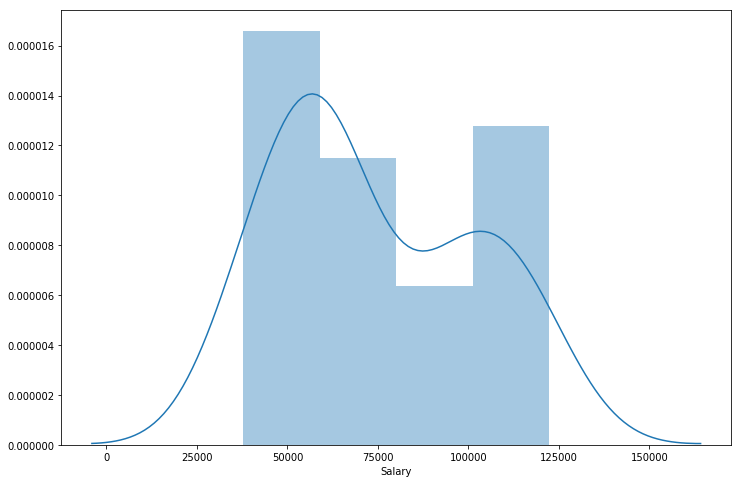

In [23]:
plt.figure(figsize=(12, 8))

sns.distplot(salary_data['Salary'])

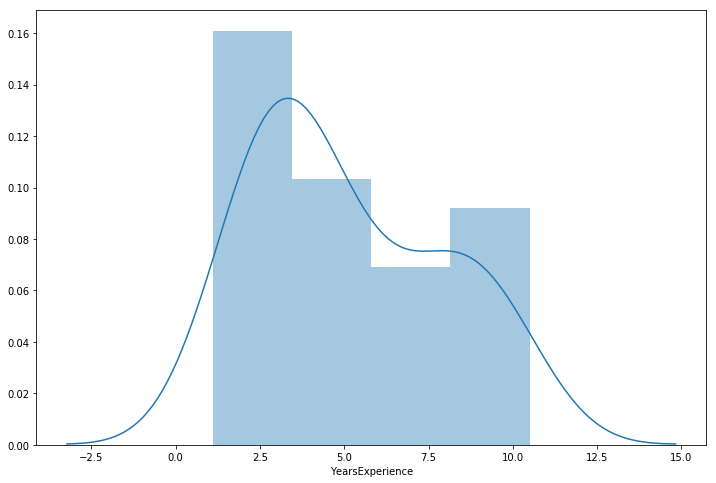

In [24]:
plt.figure(figsize=(12, 8))

sns.distplot(salary_data['YearsExperience'])

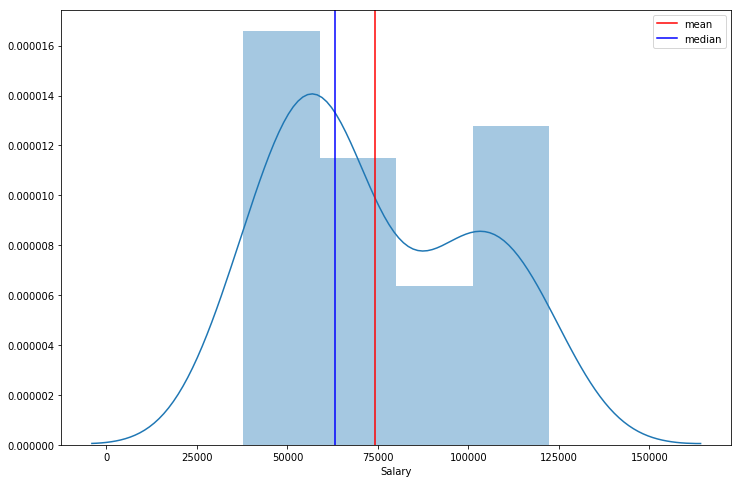

In [25]:
plt.figure(figsize=(12, 8))

sns.distplot(salary_data['Salary'])

plt.axvline(salary_mean, color='r', label='mean')
plt.axvline(salary_median, color='b', label='median')

plt.legend()

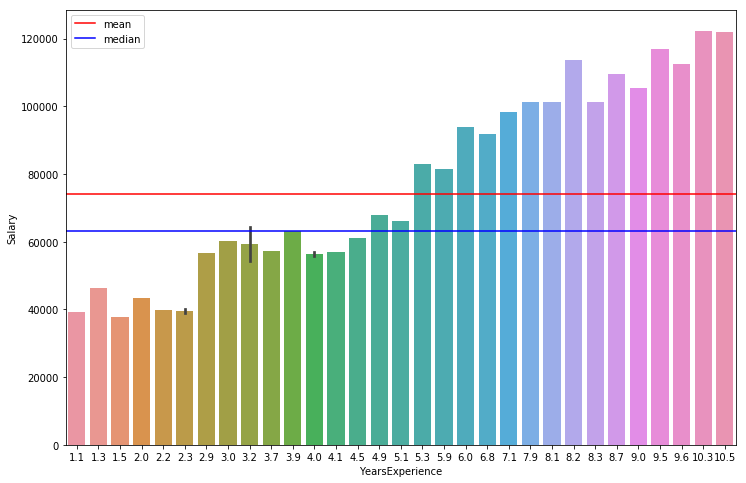

In [26]:
plt.figure(figsize=(12, 8))

sns.barplot(x='YearsExperience', y='Salary', data=salary_data)

plt.axhline(salary_mean, color='r', label='mean')
plt.axhline(salary_median, color='b', label='median')

plt.legend()

plt.show()

In [27]:
listOfSeries = [pd.Series([20, 250000], index=salary_data.columns ), 
                pd.Series([25, 270000], index=salary_data.columns ), 
                pd.Series([30, 320000], index=salary_data.columns )]

In [28]:
salary_updated = salary_data.append(listOfSeries , ignore_index=True)

salary_updated.tail()

YearsExperience    Salary
35             10.3  122391.0
36             10.5  121872.0
37             20.0  250000.0
38             25.0  270000.0
39             30.0  320000.0

In [29]:
salary_updated_mean = scipy.mean(salary_updated['Salary'])

salary_updated_mean

89558.6

In [30]:
salary_mean

74117.4054054054

In [31]:
salary_updated_median = scipy.median(salary_updated['Salary'])

salary_updated_median

65237.0

In [32]:
salary_median

63218.0

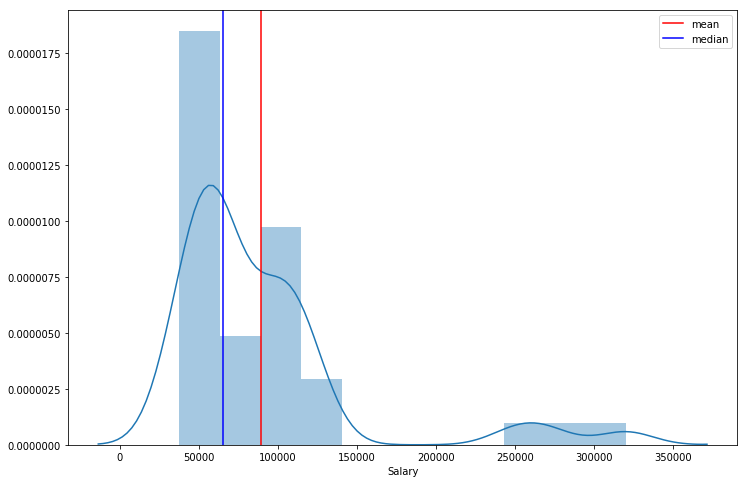

In [33]:
plt.figure(figsize=(12, 8))

sns.distplot(salary_updated['Salary'])

plt.axvline(salary_updated_mean, color='r', label='mean')
plt.axvline(salary_updated_median, color='b', label='median')

plt.legend()

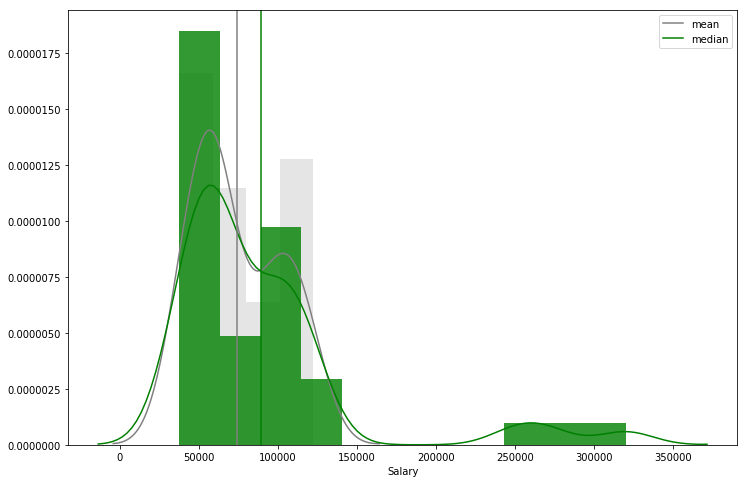

In [34]:
plt.figure(figsize=(12, 8))

sns.distplot(salary_data['Salary'], hist_kws={'alpha':0.2}, color='grey')
sns.distplot(salary_updated['Salary'], hist_kws={'alpha':0.8}, color='green')

plt.axvline(salary_mean, color='grey', label='mean')
plt.axvline(salary_updated_mean, color='green', label='median')

plt.legend()

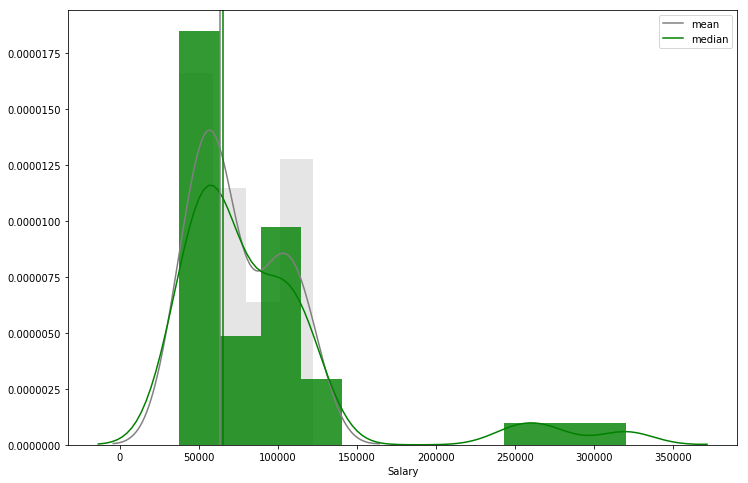

In [35]:
plt.figure(figsize=(12, 8))

sns.distplot(salary_data['Salary'], hist_kws={'alpha':0.2}, color='grey')
sns.distplot(salary_updated['Salary'], hist_kws={'alpha':0.8}, color='green')

plt.axvline(salary_median, color='grey', label='mean')
plt.axvline(salary_updated_median, color='green', label='median')

plt.legend()

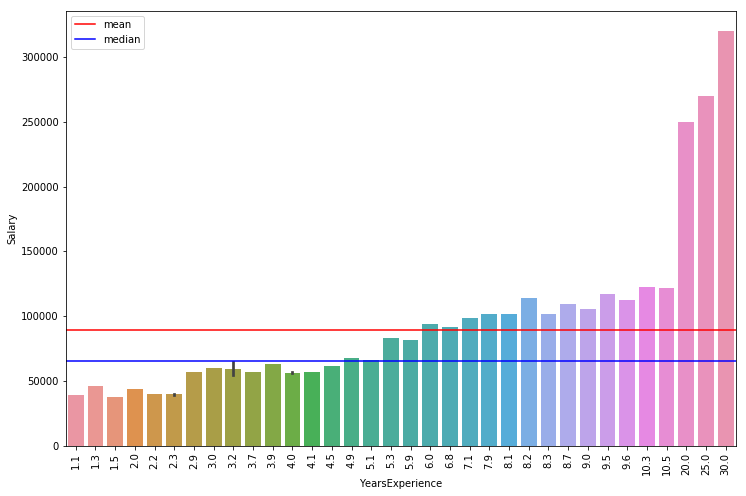

In [36]:
plt.figure(figsize=(12, 8))

sns.barplot(x='YearsExperience', y='Salary', data=salary_updated)

plt.axhline(salary_updated_mean, color='r', label='mean')
plt.axhline(salary_updated_median, color='b', label='median')
plt.xticks(rotation=90)

plt.legend()

plt.show()

In [37]:
stats.mode(salary_data['YearsExperience'])

ModeResult(mode=array([3.]), count=array([4]))

In [38]:
stats.mode(salary_data['Salary'])

ModeResult(mode=array([60150.]), count=array([4]))

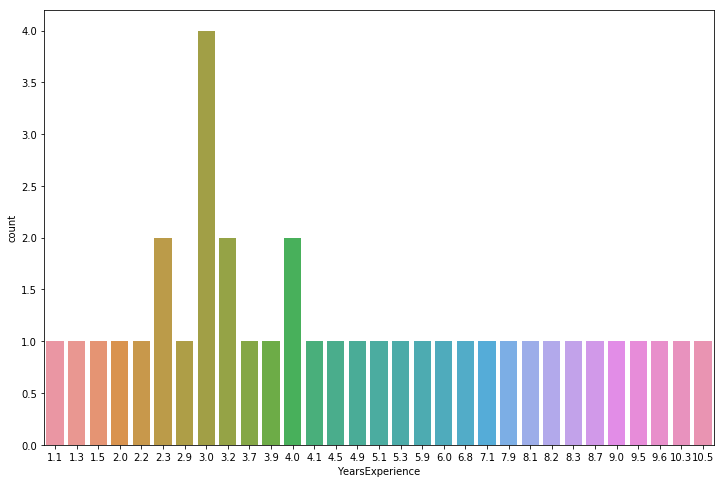

In [39]:
plt.figure(figsize=(12, 8))

sns.countplot(salary_data['YearsExperience'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

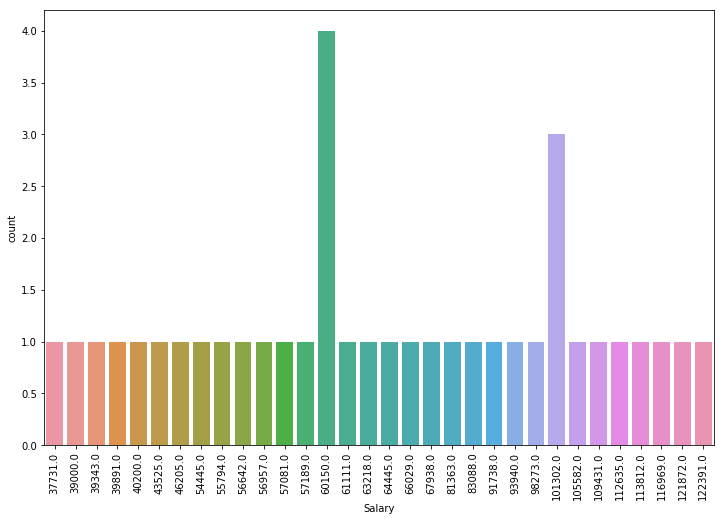

In [40]:
plt.figure(figsize=(12, 8))

sns.countplot(salary_data['Salary'])

plt.xticks(rotation=90)